**Enem, o vestibular das várias estratégias criadas para dar conta do volume de conteúdos a serem memorizados - Data Science Project**


Será que o ano de conclusão do ensino médio afetou diretamente na nota final?
O atendimento especializado funciona? Iremos responder essas e outras perguntas utilizando uma amostra de dados reais

Quando os estudantes fizeram pela primeira vez o Exame Nacional do Ensino Médio (Enem) no ano de 1998, é quase certeza que eles não imaginavam a proporção que este exame ganhou atualmente. Inicialmente com o objetivo de avaliar o desempenho dos estudantes ao final da educação básica, hoje é utilizado para desenvolver estudos e indicadores sobre a educação brasileira, além de ser uma porta de entrada para o ensino superior.


In [4]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/dvJ8bj4sQqLIZEpBg4/giphy.gif')

**Sobre os dados**

Esse estudo estará utilizando dados coletados e tratados pela equipe da Alura, na qual disponibilizou o dataset [neste link](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true). Com base nas informações dispostas nesse dataset, realizarei insights acerca dos inscritos e das circunstâncias que envolveram a prova. Importante ressaltar que tal conjunto de dados é apenas uma amostra das informações de todos os inscritos, contendo somente 127380.

**Perguntas a serem respondidas:**

Dentre alguns dos questionamentos que podem ser gerados com estes dados, tenho interesse em saber a resposta para as seguintes perguntas:

- Qual foi a proporção de homens e mulheres que participaram da prova? E qual seus desempenhos?
- Qual a relação do ano de conclusão com o desempenho nas provas? Será que os estudantes que terminaram recentemente o ensino médio levam vantagem sobre os outros inscritos?
- Existe alguma relação da variável idade com a prova de inglês/espanhol?
- Quem solicitou o atendimento especializado teve o mesmo aproveitamento de quem não solicitou?
- Será que a nota final de quem tem uma renda maior foi superior aos demais?





In [5]:
#Importando a amostra de dados Enem 2019

import pandas as pd #Biblioteca para criação de DataFrames

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte) #leitura do arquivo csv contendo as informações dos inscritos

In [6]:
#Importando numpy e bibliotecas de visualização 

import numpy as np #algebra
import seaborn as sns #gráficos
import matplotlib.pyplot as plt #plotagem
%matplotlib inline

In [7]:
print("Este dataset possui %s linhas e %s colunas" %(dados.shape[0], dados.shape[1]))

Este dataset possui 127380 linhas e 136 colunas


In [8]:
#Visualizando quantidade de valores nulos nas colunas 

dados.isnull().sum().sort_values(ascending=False)

CO_UF_ESC                 98753
NO_MUNICIPIO_ESC          98753
TP_SIT_FUNC_ESC           98753
TP_LOCALIZACAO_ESC        98753
TP_DEPENDENCIA_ADM_ESC    98753
                          ...  
IN_NOME_SOCIAL                0
CO_MUNICIPIO_PROVA            0
NO_MUNICIPIO_PROVA            0
CO_UF_PROVA                   0
NU_INSCRICAO                  0
Length: 136, dtype: int64

In [9]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


Acima temos as primeiras linhas do nosso dataset. A princípio as informações podem parecer nebulosas, então, vamos esclarecer alguns pontos sobre isso começando pelas colunas que não usaremos, como por exemplo a “NU_INSCRICAO”, “CO_ESCOLA” e “TX_RESPOSTAS_MT”, que contém informações sobre o número da inscrição do estudante, o código da escola e o vetor com as respostas da parte objetiva da prova de matemática, respectivamente. Acredito que informações deste tipo não são relevantes ao estudo que faremos e sua permanência poderia causar perda de foco, sem contar a quantidade considerável de valores nulos.

Para deixar as informações mais claras a qualquer leitor, irei renomear alguns dados.

In [10]:
dados['TP_ESTADO_CIVIL'] = dados['TP_ESTADO_CIVIL'].replace([0,1,2,3,4],['Não informado','Solteiro(a)','Casado(a)','Divorciado(a)','Viúvo(a)'])
dados['TP_LINGUA'] = dados['TP_LINGUA'].replace([0,1],['Inglês','Espanhol'])
dados['TP_ANO_CONCLUIU'] = dados['TP_ANO_CONCLUIU'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13],['2018','2017','2016','2015','2014','2013','2012','2011','2010','2009','2008','2007','2006'])

**Dicionário de Dados:**

Dados devidamente renomeados para um melhor entendimento, é hora de comentar o que cada um desses significa:

**TP_ESTADO_CIVIL** - Estado civil do inscrito.

**TP_ANO_CONCLUIU** - Ano de conclusão do ensino médio. Temos valores de 2007 a 2018. (O ano de 2006 irá servir para todos os inscritos que informaram que se formou antes de 2007)

**TP_SEXO** - Sexo. Temos F = feminino, M = masculino

**TP_LINGUA** - Lingua estrangeira. 1 = espanhol, 0 = inglês


Você já deve ter percebido que temos o código da residência do inscrito e também a sigla UF. Importante ressaltar que neste estudo utilizaremos a sigla.

Continuando nossa tratativa dos dados, irei criar uma coluna com a média de todas as prova para melhor entendimento, assim conseguimos ter um compilado do desempenho de cada participante.

In [11]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados["NU_NOTA_FINAL"] = dados[provas].mean(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_FINAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,Solteiro(a),3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,Espanhol,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,457.780000
1,190001004674,2019,1504208,Marabá,15,PA,23,M,Solteiro(a),3,1,1504208.0,Marabá,15.0,PA,1,2016,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,Espanhol,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,394.866667
2,190001004722,2019,1501402,Belém,15,PA,35,F,Casado(a),1,1,1501402.0,Belém,15.0,PA,1,2007,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,Espanhol,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,470.100000
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,Solteiro(a),3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,2012,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,Espanhol,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,511.140000
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,Solteiro(a),3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,Inglês,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,560.700000


In [12]:
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


A função describe permite saber rapidamente um resumo estatístico do DataFrame, como média, desvio padrão, nº máximo, nº mínimo, moda, media, quartis etc.

**Visualização de dados**

Vamos ao nosso primeiro questionamento:

*Qual foi a proporção de homens e mulheres que participaram da prova? E qual seus desempenhos?*

In [13]:
#Criando uma variável com os estados ordenados 

estados = dados['SG_UF_RESIDENCIA'].unique()
estados.sort()

In [14]:
#Criando variável com a quantidade de participantes por estado
participantes_estado = dados['SG_UF_RESIDENCIA'].value_counts().sort_index()

Text(0, 0.5, 'Quantidade de pessoas')

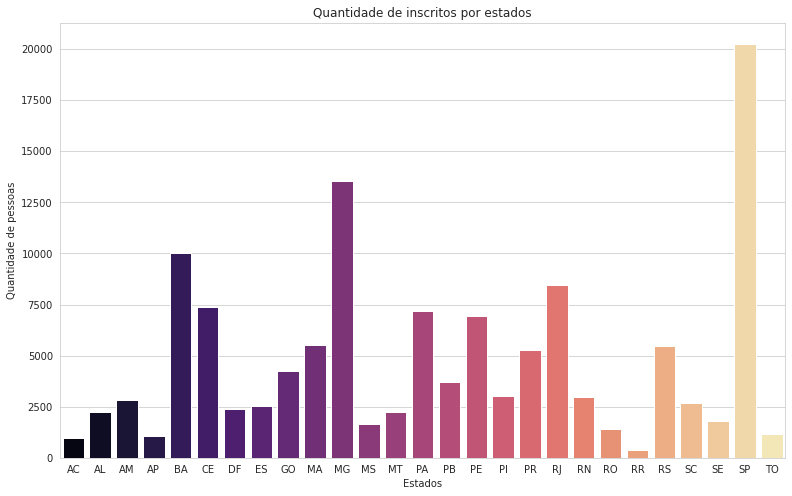

In [15]:
plt.figure(figsize=(13,8))
sns.set_style('whitegrid')
sns.barplot(x=estados, y=participantes_estado, data=dados,palette='magma')
plt.title("Quantidade de inscritos por estados")
plt.xlabel("Estados")
plt.ylabel("Quantidade de pessoas")

Antes de sabermos a proporção de inscritos por sexo, é interessante olharmos para um todo segmentado por estado. O gráfico acima nos mostra que de acordo com os dados da amostra temos a maior concentração de participantes na região sudeste e nordeste. Até aqui isso não nos diz muita coisa, ainda assim é importante salientar que estudos passados comprovam que a localização gráfica interfere sim no desempenho dos estudantes, uma curiosidade deste estudo é que a região sudeste foi a que mais levou "vantagem" e a região nordeste a que mais ficou em "desvantagem". 


Text(0, 0.5, 'Quantidade')

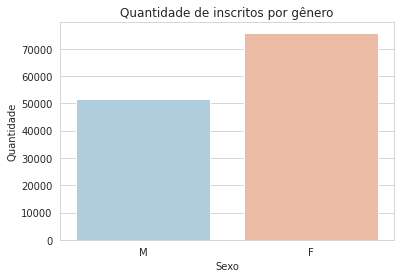

In [16]:
#Visualização distribuição por gênero
sns.set_style('whitegrid')
sns.countplot(x='TP_SEXO',data=dados,palette='RdBu_r')
plt.title("Quantidade de inscritos por gênero")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")

Acima temos a distribuição por sexo, notamos que de acordo com a amostra o número de mulheres que se inscreveu para a prova foi superior, representando aproximadamente 60% dos dados. Também seria interessante sabermos a proporção do sexo por estado civil, para entendermos melhor quem vai fazer a prova.

Text(0.5, 0, 'Estado Civil')

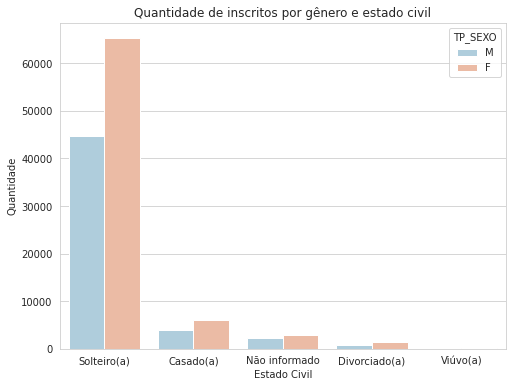

In [17]:
#Distribuição por gênero e estado civil
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.countplot(x='TP_ESTADO_CIVIL',hue='TP_SEXO',data=dados,palette='RdBu_r')
plt.title("Quantidade de inscritos por gênero e estado civil")
plt.ylabel("Quantidade")
plt.xlabel("Estado Civil")

Com o gráfico acima notamos que a maior concentração de inscritos fica entre os solteiros. Se olharmos para as mulheres, dos 60% que elas representam na amostra total, aproximadamente 86% é solteira.

In [18]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/e1BxgoFxAOmbK/giphy.gif')

In [19]:
#Consulta do desempenho agrupado por gênero

media_notas_genero = dados.groupby(['TP_SEXO']).mean()["NU_NOTA_FINAL"]
media_notas_genero.sort_values()

TP_SEXO
F    514.389756
M    526.237383
Name: NU_NOTA_FINAL, dtype: float64

Embora a diferença entre a quantidade de participantes do sexo masculino e feminino terem sido grandes em seu primeiro momento, quando refletimos tais valores para a nota média final os homens tiram ligeiramente notas maiores. Segundo o resultado gerado pelo código acima, os homens levam uma vantagem de 12 pontos na nota final, chegando a ser aproximadamente 2,3% superior a nota das mulheres.

**Identifiquem-se: Rivais novos e poderosos**

Após descobrirmos a proporção dos inscritos masculinos e femininos e calcularmos como foi o seu desempenho, vamos analisar a relação do ano de conclusão com as notas. Será que os estudantes recém-formados no ensino médio tem uma vantagem sobre os veteranos?

Para responder a isso, vamos inicialmente excluir os dados em que o ano de conclusão do ensino médio não foi informado, realizando em seguida nossa análise.

In [20]:
# Criando dataframe para analisar o desempenho com o ano de conclusão do ensino médio, removendo dados "não informados"

df = dados.query("TP_ANO_CONCLUIU != 0")

In [21]:
#Passando os anos para uma variável

ano = df['TP_ANO_CONCLUIU'].unique()
ano.sort()

Text(0.5, 0, 'Ano de conclusão do ensino médio')

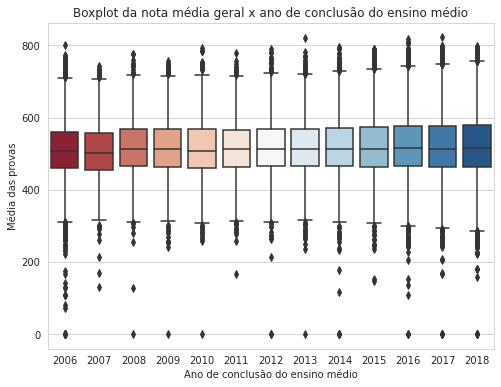

In [22]:
#Boxplot de ano de conclusão ensino médio x nota média final

plt.figure(figsize=(8,6))
sns.boxplot(x='TP_ANO_CONCLUIU', y = "NU_NOTA_FINAL", data = df,palette='RdBu', order=ano)
plt.title("Boxplot da nota média geral x ano de conclusão do ensino médio")
plt.ylabel("Média das provas")
plt.xlabel("Ano de conclusão do ensino médio")

Ei, psiu! Você mesmo, não é fã do boxplot né? Nós também conseguimos chegar neste mesmo resultado através da seguinte consulta: 


In [23]:
df.groupby(['TP_ANO_CONCLUIU']).mean()["NU_NOTA_FINAL"].sort_index()

TP_ANO_CONCLUIU
2006    509.940530
2007    508.202124
2008    515.934888
2009    517.520452
2010    513.168797
2011    516.530398
2012    518.763558
2013    518.799048
2014    520.728497
2015    521.991006
2016    525.164810
2017    523.598153
2018    523.129641
Name: NU_NOTA_FINAL, dtype: float64

Confesso que para minha surpresa, olhando o boxplot acima vimos que inscritos que estão formados a mais de 10 anos estão tirando praticamente a mesma nota dos novatos que acabaram de sair do ensino médio. Ambos ficando na média dos 500 pontos, ou seja, de acordo com a amostra de dados os  estudantes recém-formados não apresentaram vantagem em relação aos veteranos.

E parando pra pensar, temos um novo acordo ortográfico da língua portuguesa vigente desde 2009...Isso me deixou um tanto curioso: será que temos o mesmo resultado olhando só para a nota da prova de redação?

Text(0.5, 0, 'Ano de conclusão do ensino médio')

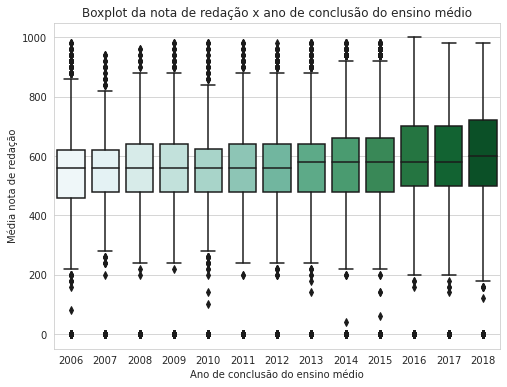

In [24]:
#Boxplot de ano de conclusão ensino médio x nota redação

plt.figure(figsize=(8,6))
sns.boxplot(x='TP_ANO_CONCLUIU', y = "NU_NOTA_REDACAO", data = df,palette='BuGn', order=ano)
plt.title("Boxplot da nota de redação x ano de conclusão do ensino médio")
plt.ylabel("Média nota de redação")
plt.xlabel("Ano de conclusão do ensino médio")

Através do gráfico acima, podemos ver que em relação a nota de redação as coisas mudam um pouco de cenário, pois os recém-formados mesmo que pouco, acabam tirando notas melhores do que veteranos. Vimos que no ano de 2018 pela primeira vez a nota da redação chegou a média de 600 pontos e é importante salientar que com o passar dos anos as correções têm ficado mais rígidas.

In [36]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/aQQ0V6tr9DsCA/giphy.gif')

**I speak English x Espanhol é mais fácil**

Com toda certeza você já deve ter visto alguém escolher espanhol ao invés do inglês e na maioria das vezes essa pessoa escolhe espanhol não por conhecer ou falar, mas sim pela "proximidade" que tem com a lingua portuguesa.

Vamos analisar a distribuição da variável idade e verificar se a hipótese de candidatos mais novos escolher inglês e de candidatos mais velhos escolher espanhol é verdadeira.


(array([9.9840e+03, 5.7126e+04, 2.8272e+04, 9.6830e+03, 7.3950e+03,
        3.9300e+03, 3.7460e+03, 2.1310e+03, 1.8730e+03, 1.0220e+03,
        7.6800e+02, 7.0000e+02, 3.2500e+02, 2.1900e+02, 1.1600e+02,
        5.5000e+01, 2.5000e+01, 7.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([13.  , 16.45, 19.9 , 23.35, 26.8 , 30.25, 33.7 , 37.15, 40.6 ,
        44.05, 47.5 , 50.95, 54.4 , 57.85, 61.3 , 64.75, 68.2 , 71.65,
        75.1 , 78.55, 82.  ]),
 <a list of 20 Patch objects>)

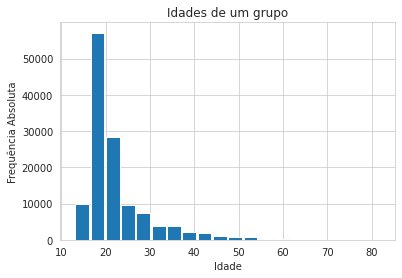

In [25]:
#Histograma da variável idade

plt.title('Idades de um grupo')
plt.xlabel('Idade')
plt.ylabel('Frequência Absoluta')
plt.hist(dados['NU_IDADE'], 20, rwidth=0.9,)

In [26]:
dados['NU_IDADE'].describe()

count    127380.000000
mean         22.094355
std           7.498707
min          13.000000
25%          18.000000
50%          19.000000
75%          24.000000
max          82.000000
Name: NU_IDADE, dtype: float64

Através do histrograma e também da função describe, conseguimos identificar que boa parte são pessoas jovens, os inscritos da nossa amostra tem em média 22 anos. A idade da pessoa mais nova é 13 anos e a da mais velha é 82 anos.

Text(0.5, 0, 'Prova de língua estrangeira')

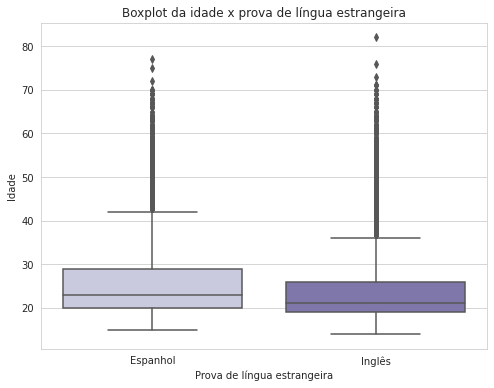

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x='TP_LINGUA', y = "NU_IDADE", data = df,palette='Purples')
plt.title("Boxplot da idade x prova de língua estrangeira")
plt.ylabel("Idade")
plt.xlabel("Prova de língua estrangeira")

In [28]:
#Consultando desempenho na prova

df.groupby(['TP_LINGUA']).mean()["NU_NOTA_LC"].sort_index()

TP_LINGUA
Espanhol    507.435387
Inglês      541.860812
Name: NU_NOTA_LC, dtype: float64

Através do boxplot podemos concluir que em relação as escolhas da prova inglês e espanhol tanto jovens, quanto mais velhos estão bem parelhos, portando a hipótese que foi levantada de acordo com a amostra não é verdade. Ainda assim, é mais feliz em relação a nota quem escolhe a lingua inglesa, ou seja, é possível que muitas pessoas escolhem espanhol pensando ser "mais fácil".

**Os inscritos especiais**

Nossos dois últimos questionamentos giram em torno dos participantes com necessidade especial e na renda dos participantes.

Vamos começar pelos candidatos com necessidades especiais. Será que quem solicitou atendimento especializado teve o mesmo desempenho de quem não solicitou?

Importante ressaltar que existem diversas colunas de inclusão no DataSet, ainda sim para essa análise irei focar em três variáveis, são elas:
- IN_DEFICIENCIA_MENTAL
- IN_AUTISMO
- IN_DEFICIENCIA_FISICA

In [30]:
#Consultando o desempenho dos participantes com doença mental

df.groupby(['IN_DEFICIENCIA_MENTAL']).mean()["NU_NOTA_FINAL"].sort_index()

IN_DEFICIENCIA_MENTAL
0    520.248056
1    377.159000
Name: NU_NOTA_FINAL, dtype: float64

In [31]:
#Consultando o desempenho dos participantes com autismo

df.groupby(['IN_AUTISMO']).mean()["NU_NOTA_FINAL"].sort_index()

IN_AUTISMO
0    520.177141
1    569.842857
Name: NU_NOTA_FINAL, dtype: float64

In [32]:
#Consultando o desempenho dos participantes com deficiencia fisica

df.groupby(['IN_DEFICIENCIA_FISICA']).mean()["NU_NOTA_FINAL"].sort_index()

IN_DEFICIENCIA_FISICA
0    520.229298
1    499.350000
Name: NU_NOTA_FINAL, dtype: float64

Analisando essas três variáveis conseguimos notar que o paticipante que possui deficiência mental tem sua nota final 27,5% abaixo dos outros participantes. Já ao contrário desses, candidatos que possuem autismo apresentam uma nota de 8% melhor do que os demais participantes. 
Em relação aos candidatos com deficiência física o número é bastante próximo, ainda assim eles apresentam 4% da nota abaixo do restante dos participantes.

Por último, vamos verificar se a renda do candidato influência de maneira direta em sua nota final

In [43]:
#Criando variável com a renda ordenada

renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

Text(0.5, 0, 'Renda')

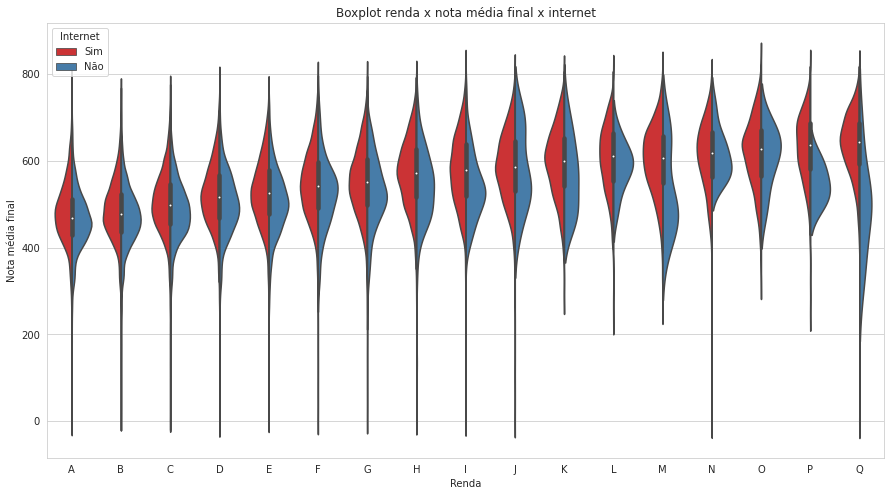

In [60]:
#Plot da renda do canditado x nota final x internet
dados['Internet'] = dados['Q025'].replace(['A','B'],['Não','Sim'])
plt.figure(figsize=(15,8))
sns.violinplot(x="Q006", y="NU_NOTA_FINAL", data=dados,hue='Internet',split=True,palette='Set1',order=renda_ordenada)
plt.title("Boxplot renda x nota média final x internet")
plt.ylabel("Nota média final")
plt.xlabel("Renda")

Text(0.5, 0, 'Tipo escola ensino médio')

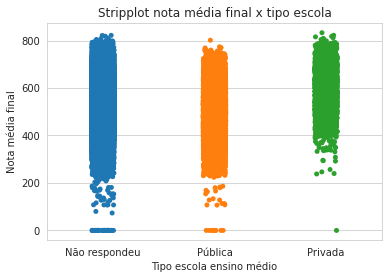

In [69]:
dados['TP_ESCOLA'] = dados['TP_ESCOLA'].replace([1,2,3],['Não respondeu','Pública','Privada'])
sns.stripplot(x="TP_ESCOLA", y="NU_NOTA_FINAL", data=dados,jitter=True)
plt.title("Stripplot nota média final x tipo escola")
plt.ylabel("Nota média final")
plt.xlabel("Tipo escola ensino médio")

Com o violinplot acima fica claro que quanto maior a renda, maior é a nota do candidato. Conseguimos reforçar isso no stripplot abaixo quando analisamos as notas de quem é de escola pública e privada. Não é novidade que o candidato que possui uma renda média/alta se prepara pro enem através de cursinhos, professores particulares etc. Por último, um fato curioso é que alguns canditados com rendas acima de 20 mil reais marcou que não possui internet. 

In [70]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/4hh91SBQJ12Tu/giphy.gif')

**Conclusão**

O Enem não é a primeira e nem será a última porta de entrada para o ensino superior. Claro que conseguindo uma nota acima da média e ter chances reais de bolsas integrais em programas como o prouni por exemplo é o desejo de todo os candidatos. Ainda assim, é importante dizer que você candidato é muito, mas muito mais que uma prova, afinal como dizia Elbert Hubbard: "Nós somos deuses em crisálidas".

Através deste estudo, quis trazer ao conhecimento fatos acerca de um dos maiores exames nacionais. A utilização de diversas visualizações de dados, a fim de deixar o entendimento mais transparente e direto. Obviamente, como todos os estudos, este não é uma exceção e poderá ser sempre refinado. O fato de não incluir modelos de machine learning para tentar prever a nota ou aprofundar em questionamentos maiores utilizando uma amostra total desses dados é algo que foge do escopo deste relatório, ainda assim, este sempre estará aberto para novas ideias e ferramentas a serem implementadas.

Os principais resultados que visualizamos aqui é que quase não existe relação do ano de conclusão com a nota média final, ou seja, a mais de 10 anos grande parte dos estudantes estão apresentando praticamente as mesmas notas, o que me leva a pensar que mais importante do que qualquer sugestão de mudança dos critérios de avaliação do enem, é melhorar a qualidade do ensino médio. 
Além disso, apesar de estarmos falando de uma amostra, a nota de canditados que possuem deficiência mental está muito abaixo a dos demais candidatos. Seria recomendável um estudo mais aprofundado em relação a isso, a partir daí elaborar planos de ações para melhorar não só o atendimento especializado no enem, e sim como a inclusão dessas pessoas como um todo na sociedade.

**Bibliografia**

https://www.soportugues.com.br/secoes/acordo_ortografico/acordo_ortografico2.php
https://www.scielo.br/scielo.php?script=sci_arttext&pid=S2176-66812013000200005
https://meetime.com.br/blog/vendas/exemplos-storytelling/
https://www.mundovestibular.com.br/vestibular/dicas/especialistas-criticam-vestibular/
https://comunidade.rockcontent.com/storytelling/
https://meetime.com.br/blog/vendas/exemplos-storytelling/
https://medium.com/matheus-rossi/data-science-explorando-os-dados-enem-d07fc14617c5
https://www.import.io/post/8-fantastic-examples-of-data-storytelling/
https://paulovasconcellos.com.br/o-que-%C3%A9-data-storytelling-ac5a924dcdaf
